In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
# %matplotlib widget

import os

import statsmodels.tools.eval_measures as bias
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [193]:
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')
df_5 = df.resample('5T').mean()
df_5.head()

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5547.831152,4353.258496,4927.916309,1355.909058,1697.601026,3396.820703,920.982605
2010-01-01 00:05:00,5535.618164,4348.893457,4916.344433,1353.716626,1699.889233,3397.829590,918.181799
2010-01-01 00:10:00,5529.010351,4331.776856,4897.709473,1346.924121,1697.138647,3424.317334,916.371033
2010-01-01 00:15:00,5514.982032,4330.051758,4879.650098,1346.241382,1705.324194,3421.112500,916.161291
2010-01-01 00:20:00,5472.567285,4314.503906,4863.172266,1334.846802,1674.401562,3409.312451,914.513721


In [194]:
df_serie4 = df_5[['SERIE4']]

In [195]:
df_serie4['index'] = range(len(df_serie4))
df_serie4.iloc[49247:75743]

C:\Users\user\AppData\Local\Temp\ipykernel_11268\1904033931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie4['index'] = range(len(df_serie4))


,SERIE4,index
Date,,
2010-06-20 23:55:00,2828.664111,49247
2010-06-21 00:00:00,2830.813281,49248
2010-06-21 00:05:00,2827.722998,49249
2010-06-21 00:10:00,2829.968164,49250
2010-06-21 00:15:00,2830.823340,49251
...,...,...
2010-09-20 23:30:00,3040.164892,75738
2010-09-20 23:35:00,3033.962793,75739
2010-09-20 23:40:00,3024.287891,75740


In [196]:
## Directorio de Figuras
dir = 'results/imgs/'
#!mkdir results/imgs/

In [197]:
directory = 'results/data/Season A'
#!mkdir 'results/data/Season A'

dict_df = {}
for filename in os.listdir(directory):
    print(filename)
    f = os.path.join(directory, filename)
    model_name = filename.split('.')[0]
    # print(model_name)
    if 'X' in filename or 'HW' in filename or 'Per' in filename or 'AR' in filename:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred']
        if 'X' in filename:
            df['index'] = range(49247, 49247 + 26520) ## rango completo 14688 49247 75743

    else:
        df = pd.read_csv(f, header=None)
        df.columns = ['index', 't_pred', 'y_pred', 't_sel', 't_corr']
    
    df['model'] = model_name
    if df['y_pred'].dtype == 'object':
        df['y_pred'] = df['y_pred'].str.replace('[', '')
        df['y_pred'] = df['y_pred'].str.replace(']', '')
    df['y_pred'] = pd.to_numeric(df['y_pred'])
    df.set_index('index', inplace = True)
    
    dict_df.update({
        model_name : df
    })

C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')


AnMA_Bagg.csv
AnMA_Bagg_euc.csv
AnMA_Boost.csv
AnMA_Boost_euc.csv
AnMA_Lasso.csv


C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykern

AnMA_Lasso_euc.csv
AnMA_OLS.csv
AnMA_OLS_euc.csv
AnMA_PCR.csv
AnMA_PLS.csv
AnMA_PLS_euc.csv
AnMA_RF.csv


C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykern

AnMA_RF_euc.csv
AnMA_Ridge.csv
AnMA_Ridge_euc.csv
An_Bagg.csv
An_Bagg_euc.csv
An_Boost.csv
An_Boost_euc.csv


C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')
C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace('[', '')
C:\Users\user\AppData\Local\Temp\ipykernel_11268\1897829137.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['y_pred'] = df['y_pred'].str.replace(']', '')


An_Lasso.csv
An_Lasso_euc.csv
An_OLS.csv
An_OLS_euc.csv
An_PCR.csv
An_PLS.csv
An_PLS_euc.csv
An_RF.csv
An_RF_euc.csv
An_Ridge.csv
An_Ridge_euc.csv
ARMA.csv
HWA.csv
HWM.csv
XAnMA_Bagg.csv
XAnMA_Bagg_euc.csv
XAnMA_Boost.csv
XAnMA_Boost_euc.csv
XAnMA_Lasso.csv
XAnMA_Lasso_euc.csv
XAnMA_OLS.csv
XAnMA_OLS_euc.csv
XAnMA_PCR.csv
XAnMA_PLS.csv
XAnMA_PLS_euc.csv
XAnMA_RF.csv
XAnMA_RF_euc.csv
XAnMA_Ridge.csv
XAnMA_Ridge_euc.csv
XAn_Bagg.csv
XAn_Bagg_euc.csv
XAn_Boost.csv
XAn_Boost_euc.csv
XAn_euc.csv
XAn_Lasso.csv
XAn_Lasso_euc.csv
XAn_OLS.csv
XAn_PCR.csv
XAn_PLS.csv
XAn_PLS_euc.csv
XAn_RF.csv
XAn_RF_euc.csv
XAn_Ridge.csv
XAn_Ridge_euc.csv
XARMA.csv
XHWA.csv
XHWM.csv


In [198]:
df

,t_pred,y_pred,model
index,,,
49247,6.358090,2822.406004,XHWM
49248,6.358356,2827.394090,XHWM
49249,6.358395,2829.360753,XHWM
49250,6.358422,2834.310087,XHWM
49251,6.358444,2842.275278,XHWM
...,...,...,...
75762,4.813393,2825.970593,XHWM
75763,4.813412,2815.441130,XHWM
75764,4.813433,2806.720797,XHWM


In [199]:
# Persistente
df_serie4_sel = df_serie4.iloc[49247:75743]
df_serie4_per = df_serie4_sel.copy()
df_serie4_per.SERIE4 = df_serie4_sel.SERIE4.shift(periods=1, fill_value = df_serie4.iloc[49246].SERIE4)
df_serie4_per.rename(columns = {'SERIE4':'y_pred'}, inplace = True)
df_serie4_per['t_pred']=0.1
df_serie4_per['model']='Per'
df_serie4_per=df_serie4_per.set_index('index')
df_serie4_per

,y_pred,t_pred,model
index,,,
49247,2828.313135,0.1,Per
49248,2828.664111,0.1,Per
49249,2830.813281,0.1,Per
49250,2827.722998,0.1,Per
49251,2829.968164,0.1,Per
...,...,...,...
75738,3043.223877,0.1,Per
75739,3040.164892,0.1,Per
75740,3033.962793,0.1,Per


In [200]:
dict_df
dict_df["Per"] = df_serie4_per

In [201]:
from datetime import datetime as dt
from matplotlib import pyplot as plt, dates as mdates

In [202]:
df_serie4_copy = df_serie4.copy()
df_serie4_copy.reset_index(inplace=True)
df_serie4_copy

,Date,SERIE4,index
0,2010-01-01 00:00:00,1355.909058,0
1,2010-01-01 00:05:00,1353.716626,1
2,2010-01-01 00:10:00,1346.924121,2
3,2010-01-01 00:15:00,1346.241382,3
4,2010-01-01 00:20:00,1334.846802,4
...,...,...,...
200634,2011-11-28 15:30:00,1824.311914,200634
200635,2011-11-28 15:35:00,1832.722339,200635
200636,2011-11-28 15:40:00,1830.256812,200636
200637,2011-11-28 15:45:00,1824.559302,200637


In [203]:
dates_by_index = df_serie4_copy.iloc[dict_df['XAn_PCR'].index].Date
dates_by_index.iloc[61220- 49247:61777- 49247]

61220   2010-08-01 13:40:00
61221   2010-08-01 13:45:00
61222   2010-08-01 13:50:00
61223   2010-08-01 13:55:00
61224   2010-08-01 14:00:00
                ...        
61772   2010-08-03 11:40:00
61773   2010-08-03 11:45:00
61774   2010-08-03 11:50:00
61775   2010-08-03 11:55:00
61776   2010-08-03 12:00:00
Name: Date, Length: 557, dtype: datetime64[ns]

In [204]:
dict_df['XAn_PCR'].index

Int64Index([49247, 49248, 49249, 49250, 49251, 49252, 49253, 49254, 49255,
            49256,
            ...
            75757, 75758, 75759, 75760, 75761, 75762, 75763, 75764, 75765,
            75766],
           dtype='int64', name='index', length=26520)

In [205]:
df_serie4_sel_copy = df_serie4_sel.copy()
df_serie4_sel_copy.reset_index(inplace=True)
df_serie4_sel_copy

,Date,SERIE4,index
0,2010-06-20 23:55:00,2828.664111,49247
1,2010-06-21 00:00:00,2830.813281,49248
2,2010-06-21 00:05:00,2827.722998,49249
3,2010-06-21 00:10:00,2829.968164,49250
4,2010-06-21 00:15:00,2830.823340,49251
...,...,...,...
26491,2010-09-20 23:30:00,3040.164892,75738
26492,2010-09-20 23:35:00,3033.962793,75739
26493,2010-09-20 23:40:00,3024.287891,75740
26494,2010-09-20 23:45:00,3021.757666,75741


In [206]:
x=4100
[57120+x,57390+1.07*x]

[61220, 61777.0]

In [207]:
import matplotlib.dates as mdates

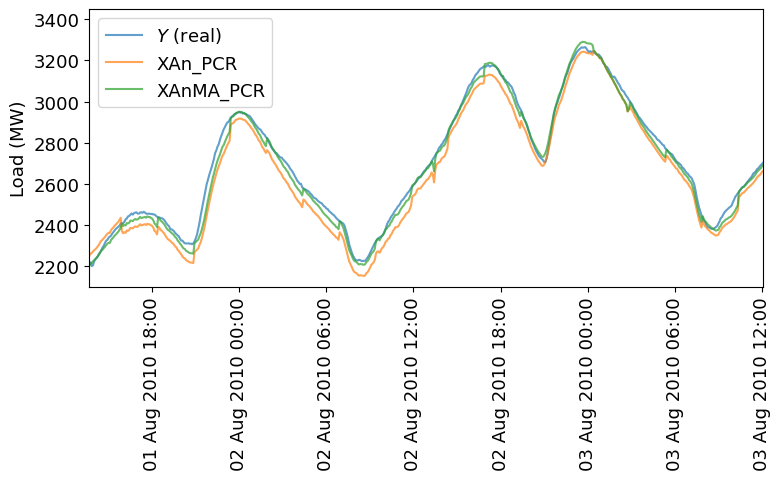

In [208]:
dict_best=(['XAn_PCR','XAnMA_PCR'] )
plt.figure(figsize=(8, 5))
ax = plt.gca()
myFmt = mdates.DateFormatter("%d %b %Y %H:%M")
ax.xaxis.set_major_formatter(myFmt)
plt.plot(df_serie4_sel_copy.Date, df_serie4_sel_copy.SERIE4, label='$Y$ (real)', alpha = 0.7)
for k in dict_best:
    dict_df[k]['Date'] = dates_by_index
    plt.plot(dict_df[k].Date, dict_df[k].y_pred, label=k, alpha = 0.7, markersize=4)#,marker='x'

plt.xlim(dates_by_index.iloc[[61220- 49247,61777- 49247]])
plt.xticks(rotation = 90)
plt.ylim([2100,3450])
# plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence') FAIL!
plt.ylabel('Load (MW)')

plt.legend()
# plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.savefig(dir+'episode2.pdf', transparent=True)
plt.show()

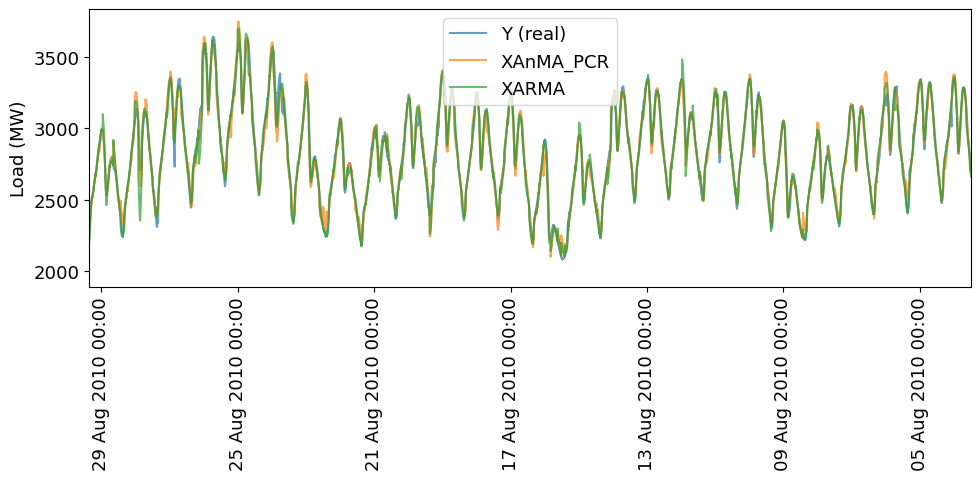

In [209]:
dict_best=(['XAnMA_PCR', 'XARMA'] )
plt.figure(figsize=(10, 5))
ax = plt.gca()
myFmt = mdates.DateFormatter("%d %b %Y %H:%M")
ax.xaxis.set_major_formatter(myFmt)
plt.plot(df_serie4_sel_copy.Date, df_serie4_sel_copy.SERIE4, label='Y (real)', alpha = 0.7)
for k in dict_best:
    dict_df[k]['Date'] = dates_by_index
    plt.plot(dict_df[k].Date, dict_df[k].y_pred, label=k, alpha = 0.7, markersize=4)#,marker='x'

plt.xlim(dates_by_index.iloc[[61220-41247 , 61777-49247]]) #[61220- 49247,61777- 49247]
plt.xticks(rotation = 90)
#plt.ylim([2200,3450])
# plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence') FAIL!
plt.ylabel('Load (MW)')

plt.legend()
# plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.savefig(dir+'episode1.pdf', transparent=True)
plt.show()

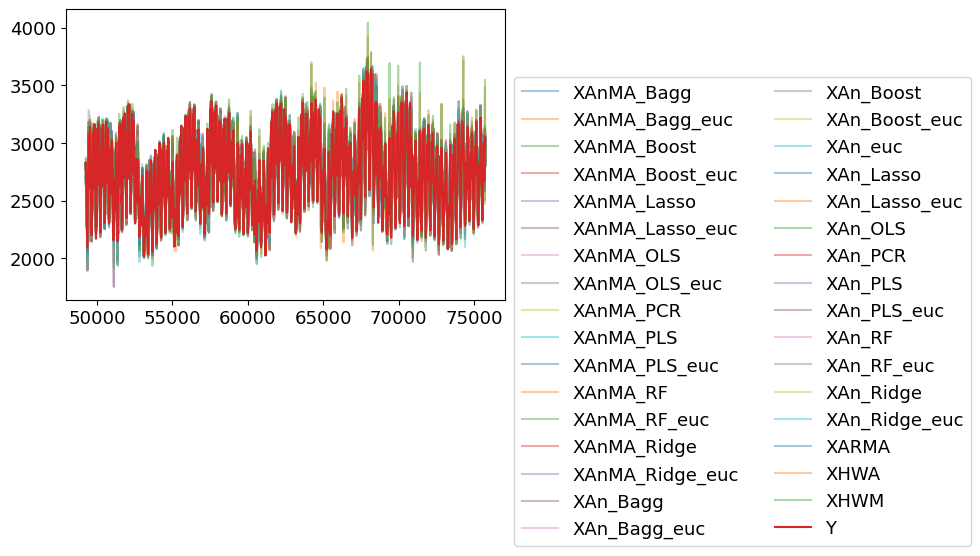

In [210]:
plt.figure(figsize=(10, 5))
for k in dict_df.keys():
    if 'X' in k:
        plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

# plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence') FAIL!
plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

plt.legend(bbox_to_anchor=(1, 0.8), ncol = 2)
plt.tight_layout()
plt.show()

In [211]:
if False:
    plt.figure()
    for k in dict_df.keys():
        if 'X' not in k:
            plt.plot(dict_df[k].y_pred, label=k, alpha = 0.4)

    plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

    plt.legend(bbox_to_anchor=(1, 0.8), ncol=2)
    plt.tight_layout()
    plt.show()

In [255]:
dict_df['ARMA'].t_pred.sum()

334386.45933675766

In [213]:
d_maes = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        mae_p  = mean_absolute_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4x_sel.SERIE4)*100
    else:
        mae_p  = mean_absolute_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)
        mape_p = mean_absolute_percentage_error(dict_df[k].y_pred, df_serie4_sel.SERIE4)*100
    d_maes.append({
        'mae'    : mae_p,
        'mape'   : mape_p,
        't'      : dict_df[k].t_pred.mean(),
        't_std'  : dict_df[k].t_pred.std(),
        'method' : k
    })
df_maes = pd.DataFrame(d_maes)
df_maes


,mae,mape,t,t_std,method
0,12.572421,0.469341,1.594884,3.931365e-02,AnMA_Bagg
1,14.862434,0.554090,1.980451,1.530537e-01,AnMA_Bagg_euc
2,12.138571,0.453520,1.529895,2.439601e-02,AnMA_Boost
3,14.291310,0.532521,1.791521,2.804974e-02,AnMA_Boost_euc
4,7.834958,0.289199,1.533478,7.683243e-02,AnMA_Lasso
...,...,...,...,...,...
62,53.347540,1.979339,1.966134,1.419358e-01,XAn_Ridge_euc
63,29.224151,1.073913,12.636212,6.142939e-01,XARMA
64,37.709870,1.373157,3.538998,1.219198e+00,XHWA
65,39.698546,1.429735,5.591182,8.666631e-01,XHWM


In [214]:
df_maes_not_x = df_maes[~df_maes.method.str.contains('X')]

# renaming
df_maes_not_x.method = df_maes_not_x.method.str.replace('_', '-')
df_maes_not_x.loc[df_maes_not_x.method == 'ARMA', 'method'] = 'ARMA ($\\times 8$ cores)'
t = df_maes_not_x[df_maes_not_x.method.isin(['Per', 'HWM', 'HWA', 'ARMA ($\\times 8$ cores)'])]

# colors
colors = np.repeat('#000080', 34).tolist()
colors[0] = 'orange'
colors[8] = 'orange'
colors[9] = 'orange'
colors[10] = 'orange'

C:\Users\user\AppData\Local\Temp\ipykernel_11268\3644577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_not_x.method = df_maes_not_x.method.str.replace('_', '-')


In [232]:
df_maes_not_x

,mae,mape,t,t_std,method
30,4.454879,0.163271,12.620262,5.667033e-01,ARMA ($\times 8$ cores)
8,6.805507,0.251168,1.602229,3.935577e-02,AnMA-PCR
4,7.834958,0.289199,1.533478,7.683243e-02,AnMA-Lasso
13,7.838007,0.289311,1.618417,4.160390e-02,AnMA-Ridge
6,8.187475,0.302723,1.498857,4.346000e-02,AnMA-OLS
5,8.792110,0.325002,1.969631,1.528238e-01,AnMA-Lasso-euc
14,8.794579,0.325093,1.968823,1.524296e-01,AnMA-Ridge-euc
7,8.892793,0.328530,1.822360,3.686495e-02,AnMA-OLS-euc
66,9.030933,0.331031,0.100000,1.387805e-17,Per
32,9.822454,0.360448,5.584190,8.896585e-01,HWM


C:\Users\user\AppData\Local\Temp\ipykernel_11268\2534626189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_not_x.sort_values('mape', inplace = True)


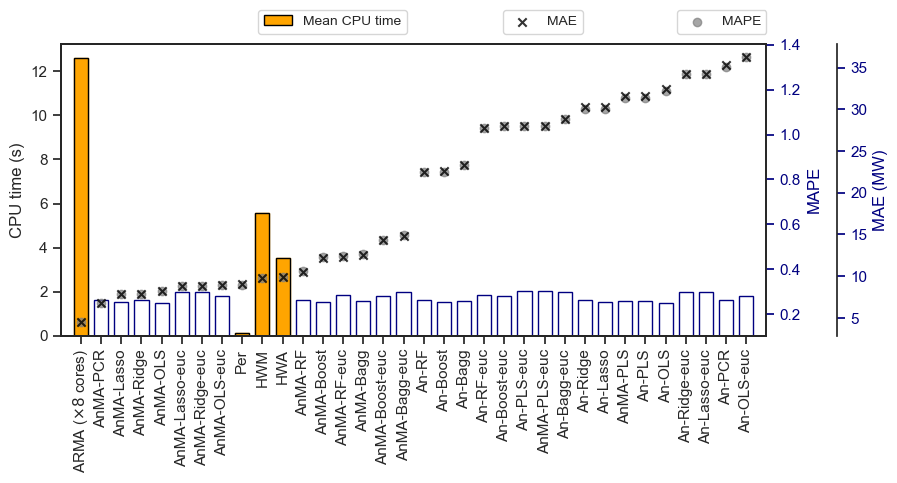

In [256]:
plt.rcParams.update({'font.size': 13})

benchmarks = ['Per', 'HWA', 'HWM']
df_maes_not_x.sort_values('mape', inplace = True)
plt.figure(figsize=(9, 5))
plt.bar(df_maes_not_x.method, df_maes_not_x.t, color = 'none', edgecolor = colors, width=0.7)
plt.bar(t.method, t.t, color = 'orange', edgecolor = 'black', width=0.7, label='Mean CPU time')
plt.xticks(rotation = 90)
plt.ylabel('CPU time (s)')
#plt.axhline(y = df_maes_not_x.t.min(), color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, 1.14), fontsize = 10, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_not_x.method, df_maes_not_x.mape, marker = 'o', color = 'gray', label = 'MAPE', alpha=0.7)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 10)
plt.ylabel('MAPE')
ax2.yaxis.label.set_color('#000080')
ax2.tick_params(axis='y', colors='#000080')

ax3 = ax.twinx()
plt.scatter(df_maes_not_x.method, df_maes_not_x.mae, marker='x', color = 'black', label = 'MAE', alpha=0.8)
plt.legend(bbox_to_anchor = (0.75, 1.14), fontsize = 10, ncols = 1)
plt.ylabel('MAE (MW)')
ax3.spines.right.set_position(("data", 37.5))
ax3.yaxis.label.set_color('#000080')
ax3.tick_params(axis='y', colors='#000080')

plt.tight_layout()
plt.xlim(-1, 34)
plt.savefig(dir+'mape_vs_time.pdf', transparent=True)
plt.savefig(dir+'mape_vs_time.png', transparent=True)

plt.show()

In [217]:
df_maes_x     = df_maes[df_maes.method.str.contains('X')]
# Ajustes
df_maes_x.method = df_maes_x.method.str.replace('_', '-')
df_maes_x.loc[df_maes_x.method == 'XARMA', 'method'] = 'XARMA ($\\times 8$ cores)'
tx = df_maes_x[df_maes_x.method.isin(['XHWM', 'XHWA', 'XARMA ($\\times 8$ cores)'])]

# xcolors
xcolors = np.repeat('#000080', len(df_maes_x)).tolist()
xcolors[0] = 'orange'
xcolors[8] = 'orange'
xcolors[9] = 'orange'

C:\Users\user\AppData\Local\Temp\ipykernel_11268\1448827633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_x.method = df_maes_x.method.str.replace('_', '-')


In [233]:
df_maes_x

,mae,mape,t,t_std,method
63,29.224151,1.073913,12.636212,0.614294,XARMA ($\times 8$ cores)
41,30.573667,1.125853,1.604062,0.039583,XAnMA-PCR
37,32.539299,1.197736,1.534966,0.077643,XAnMA-Lasso
46,32.546958,1.198023,1.619627,0.041885,XAnMA-Ridge
39,32.501965,1.198672,1.499988,0.043768,XAnMA-OLS
38,34.893413,1.301187,1.972829,0.153023,XAnMA-Lasso-euc
47,34.899433,1.301408,1.967624,0.142019,XAnMA-Ridge-euc
40,35.009231,1.306828,1.822685,0.036541,XAnMA-OLS-euc
64,37.709870,1.373157,3.538998,1.219198,XHWA
65,39.698546,1.429735,5.591182,0.866663,XHWM


C:\Users\user\AppData\Local\Temp\ipykernel_11268\4183847519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maes_x.sort_values('mape', inplace = True)


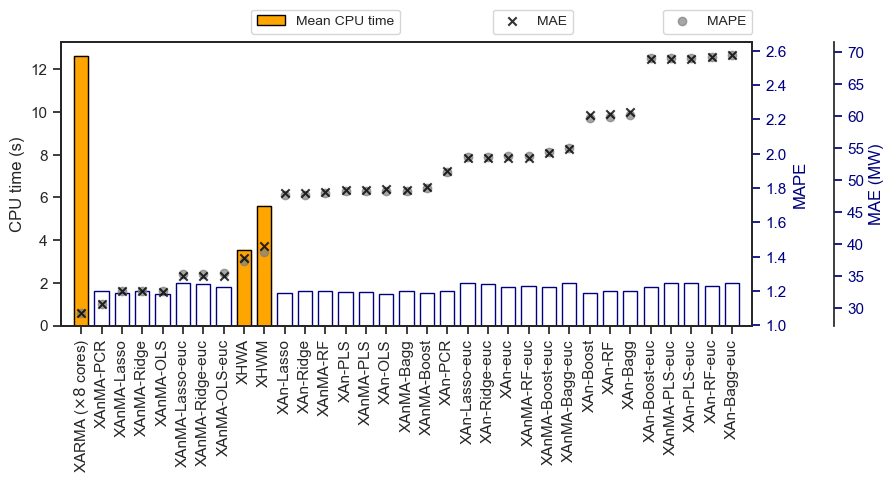

In [257]:
plt.rcParams.update({'font.size': 13})

df_maes_x.sort_values('mape', inplace = True)
plt.figure(figsize=(9, 5))
plt.bar(df_maes_x.method, df_maes_x.t, color = 'none', edgecolor = xcolors, width=0.7)
plt.bar(tx.method, tx.t, color = 'orange', edgecolor = 'black', width=0.7, label='Mean CPU time')
plt.xticks(rotation = 90)
plt.ylabel('CPU time (s)')
#plt.axhline(y = df_maes_x.t.min(), color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (0.5, 1.14), fontsize = 10, ncols = 2)
plt.tight_layout()

ax = plt.gca()
ax2 = ax.twinx()
plt.scatter(df_maes_x.method, df_maes_x.mape, marker = 'o', color = 'gray', label = 'MAPE', alpha=0.7)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 10)
plt.ylabel('MAPE')
ax2.yaxis.label.set_color('#000080')
ax2.tick_params(axis='y', colors='#000080')

ax3 = ax.twinx()
plt.scatter(df_maes_x.method, df_maes_x.mae, marker = 'x', color = 'black', label = 'MAE', alpha=0.8)
plt.legend(bbox_to_anchor = (0.75, 1.14), fontsize = 10, ncols = 1)
plt.ylabel('MAE (MW)')
ax3.spines.right.set_position(("data", 37))
ax3.yaxis.label.set_color('#000080')
ax3.tick_params(axis='y', colors='#000080')

plt.tight_layout()
plt.xlim(-1, 33)
plt.savefig(dir+'mape_vs_timeX.pdf', transparent=True)
plt.savefig(dir+'mape_vs_timeX.png', transparent=True)

plt.show()

In [220]:
# df_maes_x.sort_values('mape', inplace = True)
# plt.figure()
# plt.bar(df_maes_x.method, df_maes_x.t, label='Mean execution time')
# plt.xticks(rotation = 90)
# plt.ylabel('Mean execution time')
# plt.axhline(y = df_maes_x.t.min(), color = 'black', label='Minimun time', linestyle = '--')
# plt.legend(bbox_to_anchor = (0.78, 1.14), fontsize = 12, ncols = 2)
# plt.tight_layout()

# ax = plt.gca()
# ax2 = ax.twinx()
# plt.scatter(df_maes_x.method, df_maes_x.mape, marker = 'o', color = '#ff0000', label = 'MAPE')
# plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
# plt.ylabel('MAPE')

# plt.tight_layout()

# namefile = dir+'fig:mape_vs_timeX.pdf'
# plt.savefig(namefile, transparent=True)
# plt.show()

In [221]:
d_errors = []
df_serie4x_sel = df_serie4.iloc[49247:75767]
for k in dict_df.keys():
    if 'X' in k:
        ts_e = df_serie4x_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred

    else:
        ts_e = df_serie4_sel.reset_index().SERIE4 - dict_df[k].reset_index().y_pred
    d_errors.append(pd.Series(ts_e))
df_errors = pd.DataFrame(d_errors)
df_errors = df_errors.T
df_errors.columns = dict_df.keys()
df_errors

,AnMA_Bagg,AnMA_Bagg_euc,AnMA_Boost,AnMA_Boost_euc,AnMA_Lasso,AnMA_Lasso_euc,AnMA_OLS,AnMA_OLS_euc,AnMA_PCR,AnMA_PLS,...,XAn_PLS,XAn_PLS_euc,XAn_RF,XAn_RF_euc,XAn_Ridge,XAn_Ridge_euc,XARMA,XHWA,XHWM,Per
0,9.122671,6.948857,6.701088,44.163897,33.147039,120.351370,27.244910,117.235658,53.004237,39.971634,...,39.971634,44.163897,7.942703,23.529109,33.136926,120.315967,-1.178825,6.863250,6.258107,0.350977
1,4.371787,35.803281,5.722389,43.560925,27.886024,107.967348,22.749623,104.610874,45.076210,34.232847,...,37.155870,46.268658,9.258982,30.626798,29.902267,131.412318,1.500686,3.812146,3.419191,2.149170
2,0.171821,9.508462,1.297880,22.946610,16.362710,110.752046,13.752328,107.561885,33.737479,23.471539,...,28.883280,57.555418,7.001590,32.589130,19.948911,119.503577,-0.891405,-1.497518,-1.637755,-3.090283
3,1.438887,12.145586,3.777199,26.775082,16.887037,109.372721,15.247765,105.284159,32.286965,24.117997,...,31.776658,59.385304,9.820750,36.082563,21.507520,123.493818,-0.567934,-3.223619,-4.341923,2.245166
4,2.771636,0.517129,4.428266,7.143975,18.940140,113.752468,18.387118,110.637385,32.505634,26.219575,...,36.356429,56.322126,10.675926,37.174049,24.627879,131.781403,-3.892056,-8.440354,-11.451938,0.855176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-91.407459,-63.634323,-119.203896,-47.632377,-93.325192,-39.370822,-197.091093,-38.943204,-21.365222,NaN
26516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-81.766677,-60.422880,-70.141235,-42.456698,-83.891894,-38.563753,-192.818959,-35.204576,-15.959001,NaN
26517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-84.340069,-64.204839,-65.364461,-32.898208,-86.390525,-34.433206,-195.405249,-37.731260,-16.879391,NaN
26518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-88.551593,-70.238387,-56.656838,-36.971672,-90.791065,-38.959003,-200.140064,-40.859540,-18.630979,NaN


Prueba estadística a partir de los valores absolutos de los errores.

In [222]:
# Se usa para comparar datos ordenados y por pares
alpha = 0.05
friedman_res = stats.friedmanchisquare( df_errors.dropna().abs().AnMA_PCR, 
                                        df_errors.dropna().abs().Per, 
                                        df_errors.dropna().abs().HWM, 
                                        df_errors.dropna().abs().HWA)
print(friedman_res)
if (friedman_res.pvalue < alpha):
    print('grupos son diferentes')
else:
    print('grupos son distintos')

FriedmanchisquareResult(statistic=6626.0071105072275, pvalue=0.0)
grupos son diferentes


In [223]:
# Se usa para comparar datos ordenados y por pares
alpha = 0.05
friedman_res = stats.friedmanchisquare( df_errors.dropna().abs().XAnMA_PCR, 
                                        df_errors.dropna().abs().XARMA, 
                                        df_errors.dropna().abs().XHWM, 
                                        df_errors.dropna().abs().XHWA)
print(friedman_res)
if (friedman_res.pvalue < alpha):
    print('grupos son diferentes')
else:
    print('grupos son distintos')

FriedmanchisquareResult(statistic=2614.0389945651987, pvalue=0.0)
grupos son diferentes


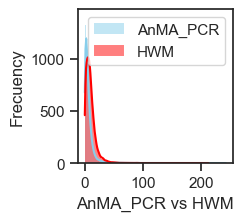

AnMA_PCR HWM
WilcoxonResult(statistic=95752847.0, pvalue=0.0)
less distribution
###########



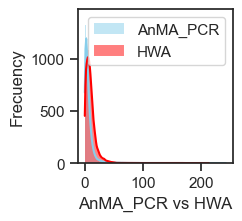

AnMA_PCR HWA
WilcoxonResult(statistic=94794076.0, pvalue=0.0)
less distribution
###########



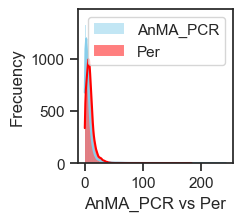

AnMA_PCR Per
WilcoxonResult(statistic=100106168.0, pvalue=0.0)
less distribution
###########



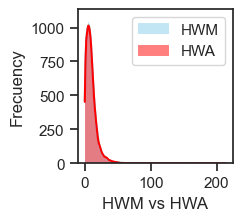

HWM HWA
WilcoxonResult(statistic=160862899.0, pvalue=2.817971155816861e-32)
less distribution
###########



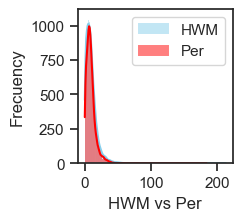

HWM Per
WilcoxonResult(statistic=200853622.0, pvalue=1.0)
less rejected
###########



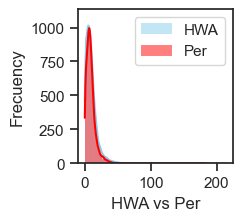

HWA Per
WilcoxonResult(statistic=204436768.0, pvalue=1.0)
less rejected
###########



In [224]:
## UN PERIODO
contentands = [
    'AnMA_PCR',
    'HWM',
    'HWA',
    'Per'
]
    #'XAn_euc'

alternative = 'less'

for c1 in range(len(contentands)):
    for c2 in range(c1 + 1, len(contentands)):
        if c1 != c2:
            sns.set(style="ticks") 
            plt.figure(figsize=(2 , 2))
            ax = plt.gca()
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c1], color="skyblue", label=contentands[c1],   kde=True, ax=ax)
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c2], color="red",     label=contentands[c2], kde=True, ax=ax)
            ax.set_xlabel(f'{contentands[c1]} vs {contentands[c2]}')
            ax.set_ylabel('Frecuency')
            plt.legend()
            #axs[0, 0].get_yaxis().set_visible(False)
            plt.show()
            print(contentands[c1], contentands[c2])
            wil_res = stats.wilcoxon(df_errors.dropna().abs()[contentands[c1]], df_errors.dropna().abs()[contentands[c2]], alternative=alternative)
            print(wil_res)
            if (wil_res.pvalue < alpha):
                print(f'{alternative} distribution')
            else:
                print(f'{alternative} rejected')
        print('###########\n')

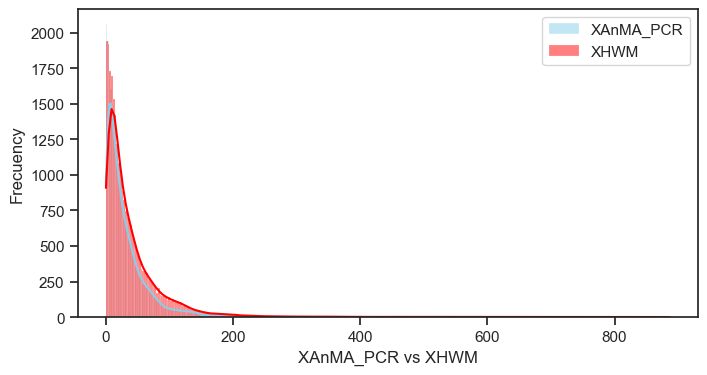

XHWM XAnMA_PCR
WilcoxonResult(statistic=211764041.0, pvalue=1.0)
less rejected
###########



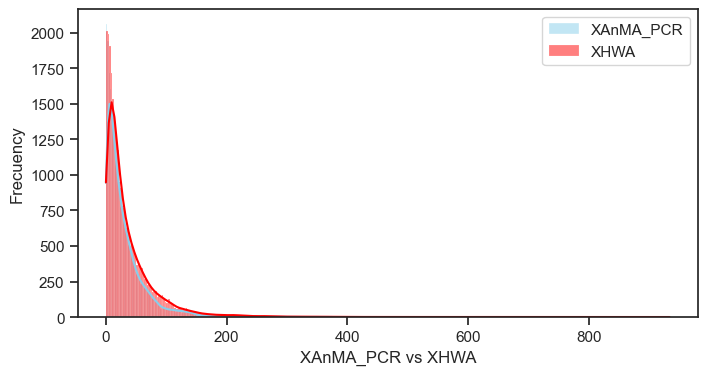

XHWA XAnMA_PCR
WilcoxonResult(statistic=202588961.0, pvalue=1.0)
less rejected
###########



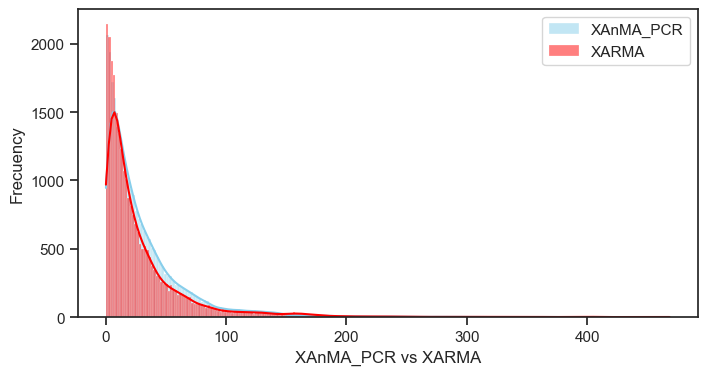

XARMA XAnMA_PCR
WilcoxonResult(statistic=153814878.0, pvalue=2.450505797916325e-68)
less distribution
###########



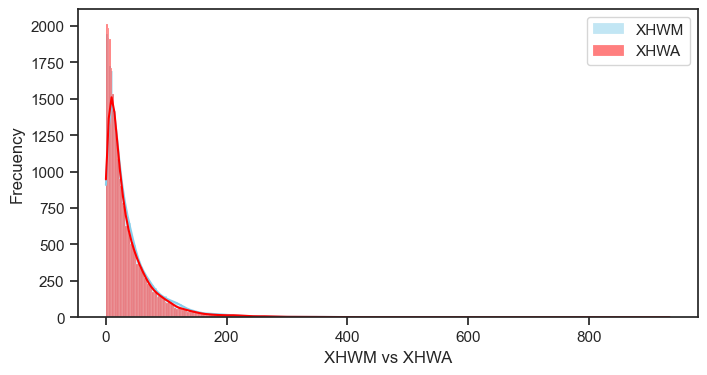

XHWA XHWM
WilcoxonResult(statistic=161414461.0, pvalue=4.875407872562623e-30)
less distribution
###########



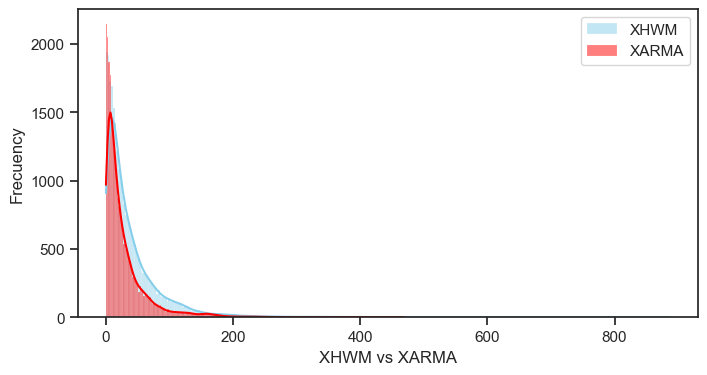

XARMA XHWM
WilcoxonResult(statistic=116304639.0, pvalue=0.0)
less distribution
###########



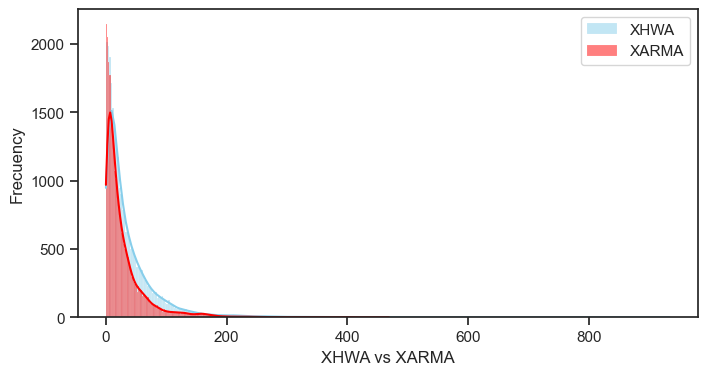

XARMA XHWA
WilcoxonResult(statistic=126832122.0, pvalue=0.0)
less distribution
###########



In [229]:
## MULTI-PERIODO
contentands = [
    'XAnMA_PCR',
    'XHWM',
    'XHWA',
    'XARMA'
]
    #'XAn_euc'

alternative = 'less'

for c1 in range(len(contentands)):
    for c2 in range(c1 + 1, len(contentands)):
        if c1 != c2:
            sns.set(style="ticks") 
            plt.figure(figsize=(8, 4))
            ax = plt.gca()
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c1], color="skyblue", label=contentands[c1],   kde=True, ax=ax)
            sns.histplot(data=df_errors.dropna().abs(), x=contentands[c2], color="red",     label=contentands[c2], kde=True, ax=ax)
            ax.set_xlabel(f'{contentands[c1]} vs {contentands[c2]}')
            ax.set_ylabel('Frecuency')
            plt.legend()
            #axs[0, 0].get_yaxis().set_visible(False)
            plt.show()
            print(contentands[c2], contentands[c1])
            wil_res = stats.wilcoxon(df_errors.dropna().abs()[contentands[c2]], df_errors.dropna().abs()[contentands[c1]], alternative=alternative)
            print(wil_res)
            if (wil_res.pvalue < alpha):
                print(f'{alternative} distribution')
            else:
                print(f'{alternative} rejected')
        print('###########\n')

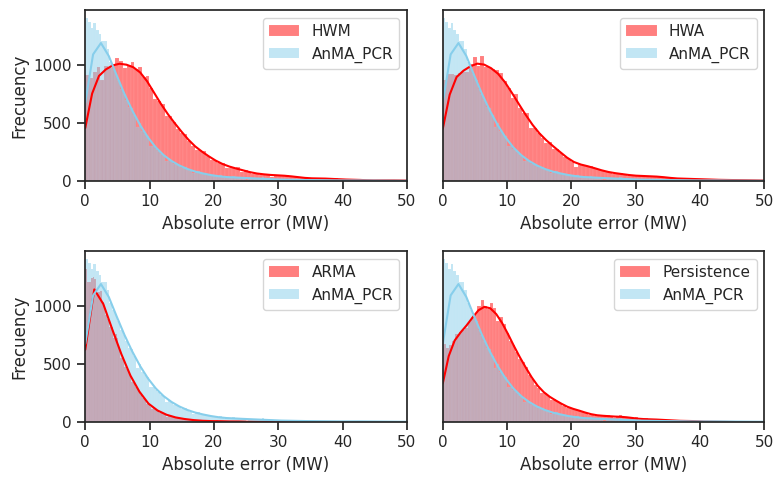

In [35]:
## UN PERIODO

sns.set(style="ticks") 
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

sns.histplot(data=df_errors.dropna().abs(), x="HWM",        color="red",   label="HWM", kde=True,    ax=axs[0, 0])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR", color="skyblue", label="AnMA_PCR",    kde=True, ax=axs[0, 0])

axs[0, 0].set_xlabel('Absolute error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="HWA",       color="red",     label="HWA",kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR",  color="skyblue", label="AnMA_PCR",  kde=True, ax=axs[0, 1])

axs[0, 1].set_xlabel('Absolute error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="ARMA",     color="red",    label="ARMA",kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR",  color="skyblue",label="AnMA_PCR",  kde=True, ax=axs[1, 0])

axs[1, 0].set_xlabel('Absolute error (MW)')
axs[1, 0].set_ylabel('Frecuency')

#axs[1, 0].get_yaxis().set_visible(False)
sns.histplot(data=df_errors.dropna().abs(), x="Per",      color="red",    label="Persistence",kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors.dropna().abs(), x="AnMA_PCR", color="skyblue",label="AnMA_PCR", kde=True, ax=axs[1, 1])

axs[1, 1].set_xlabel('Absolute error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[0, 0].set_xlim([0,50])
axs[1, 0].set_xlim([0,50])
axs[0, 1].set_xlim([0,50])
axs[1, 1].set_xlim([0,50])

plt.tight_layout()
namefile = dir+'fig:error.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

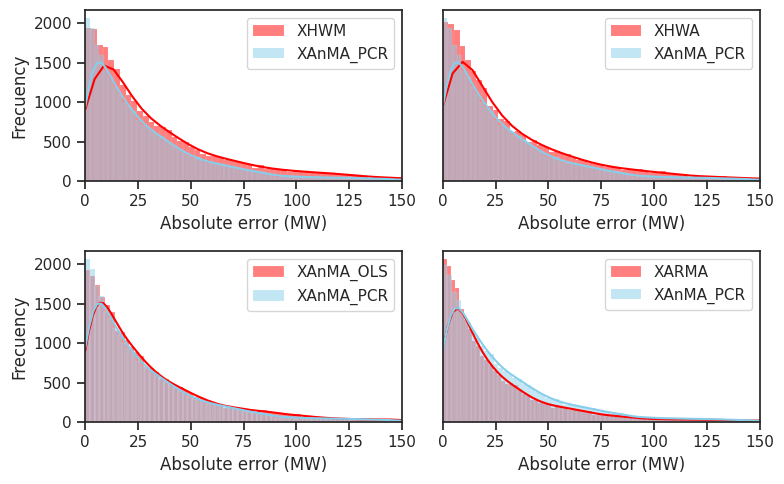

In [36]:
## TREINTA PERIODOS
sns.set(style="ticks") 
fig, axs = plt.subplots(2, 2, figsize=(8, 5))

sns.histplot(data=df_errors.dropna().abs(), x="XHWM",         color="red",     label="XHWM",        kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",    color="skyblue", label="XAnMA_PCR",   kde=True, ax=axs[0, 0])

axs[0, 0].set_xlabel('Absolute error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="XHWA",         color="red",       label="XHWA",      kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",    color="skyblue",   label="XAnMA_PCR", kde=True, ax=axs[0, 1])

axs[0, 1].set_xlabel('Absolute error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="XARMA",  color="red",        label="XARMA", kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",  color="skyblue",    label="XAnMA_PCR", kde=True, ax=axs[1, 1])


axs[1, 0].set_xlabel('Absolute error (MW)')
axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_OLS",  color="red",        label="XAnMA_OLS", kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors.dropna().abs(), x="XAnMA_PCR",  color="skyblue",    label="XAnMA_PCR", kde=True, ax=axs[1, 0])


axs[1, 1].set_xlabel('Absolute error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
axs[0, 0].set_xlim([0,150])
axs[1, 0].set_xlim([0,150])
axs[0, 1].set_xlim([0,150])
axs[1, 1].set_xlim([0,150])

plt.tight_layout()
namefile = dir+'fig:errorX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

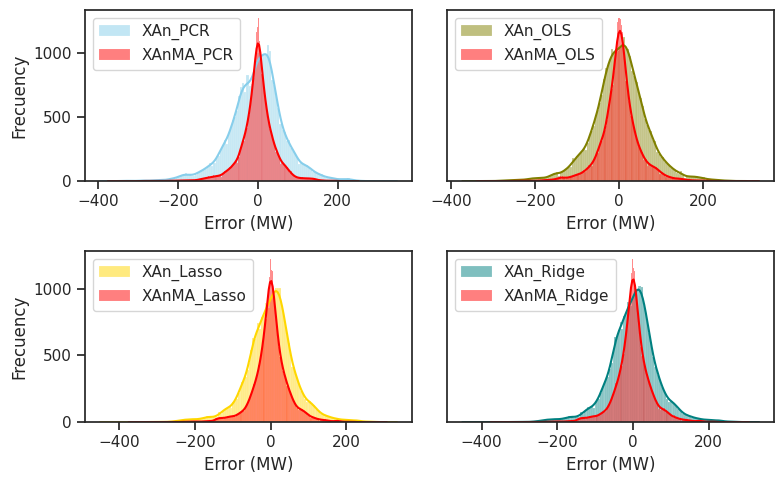

In [37]:
sns.set(style="ticks") 
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="XAn_PCR",    color="skyblue", label="XAn_PCR",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="XAnMA_PCR",  color="red",     label="XAnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="XAn_OLS",    color="olive",   label="XAn_OLS",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="XAnMA_OLS",  color="red",     label="XAnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="XAn_Lasso",  color="gold",    label="XAn_Lasso",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="XAnMA_Lasso",color="red",     label="XAnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Error (MW)')

axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="XAn_Ridge",  color="teal",    label="XAn_Ridge",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="XAnMA_Ridge",color="red",     label="XAnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.tight_layout()
namefile = dir+'fig:multipleX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

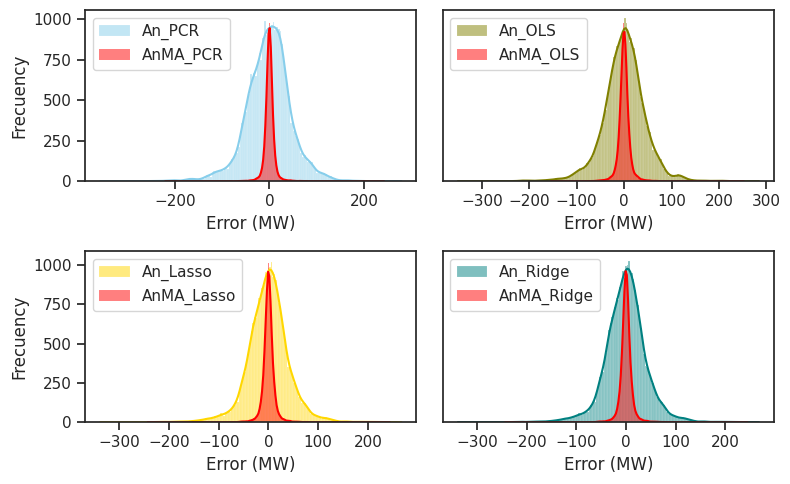

In [38]:
sns.set(style="ticks")
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="An_PCR",    color="skyblue", label="An_PCR",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="AnMA_PCR",  color="red",     label="AnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="An_OLS",    color="olive",   label="An_OLS",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="AnMA_OLS",  color="red",     label="AnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="An_Lasso",  color="gold",    label="An_Lasso",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="AnMA_Lasso",color="red",     label="AnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Error (MW)')
axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="An_Ridge",  color="teal",    label="An_Ridge",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="AnMA_Ridge",color="red",     label="AnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.tight_layout()
namefile = dir+'fig:multiple.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [39]:
df_errors_x = df_errors[[c for c in df_errors.columns if 'X' in c]]
df_errors_not_x = df_errors[[c for c in df_errors.columns if 'X' not in c]]

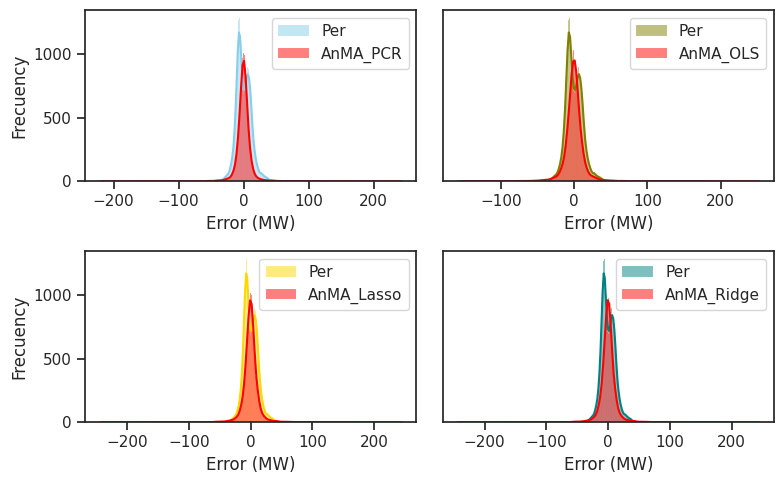

In [40]:
sns.set(style="ticks")
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
sns.histplot(data=df_errors, x="Per",    color="skyblue", label="Per",   kde=True, ax=axs[0, 0])
sns.histplot(data=df_errors, x="AnMA_PCR",  color="red",     label="AnMA_PCR", kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Error (MW)')
axs[0, 0].set_ylabel('Frecuency')
#axs[0, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="Per",    color="olive",   label="Per",    kde=True, ax=axs[0, 1])
sns.histplot(data=df_errors, x="AnMA_OLS",  color="red",     label="AnMA_OLS",  kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Error (MW)')
axs[0, 1].set_ylabel('Frecuency')
axs[0, 1].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="Per",  color="gold",    label="Per",  kde=True, ax=axs[1, 0])
sns.histplot(data=df_errors, x="AnMA_Lasso",color="red",     label="AnMA_Lasso",kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Error (MW)')
axs[1, 0].set_ylabel('Frecuency')
#axs[1, 0].get_yaxis().set_visible(False)

sns.histplot(data=df_errors, x="Per",  color="teal",    label="Per",  kde=True, ax=axs[1, 1])
sns.histplot(data=df_errors, x="AnMA_Ridge",color="red",     label="AnMA_Ridge",kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Error (MW)')
axs[1, 1].set_ylabel('Frecuency')
axs[1, 1].get_yaxis().set_visible(False)
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

plt.tight_layout()
namefile = dir+'fig:multiplePER.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

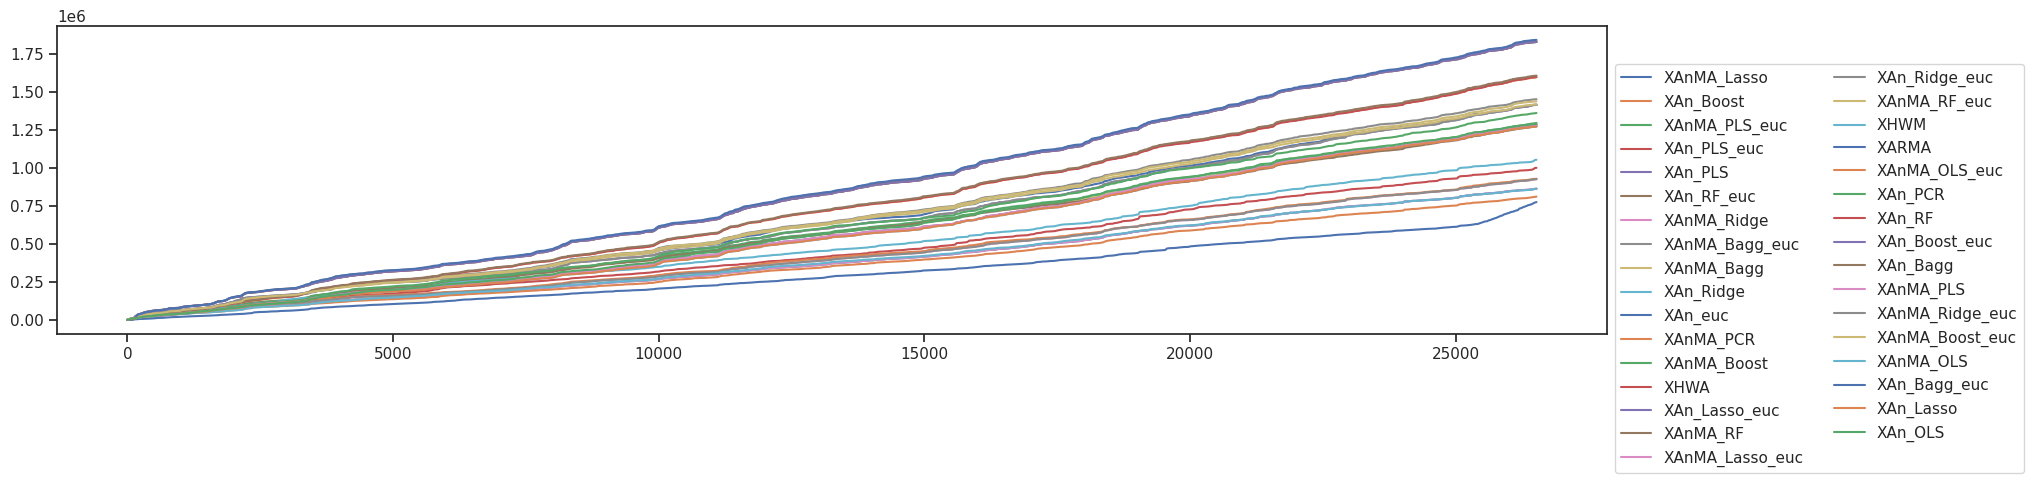

In [41]:
plt.figure(figsize=(20, 4))
for c in df_errors_x.columns:
    plt.plot(df_errors_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

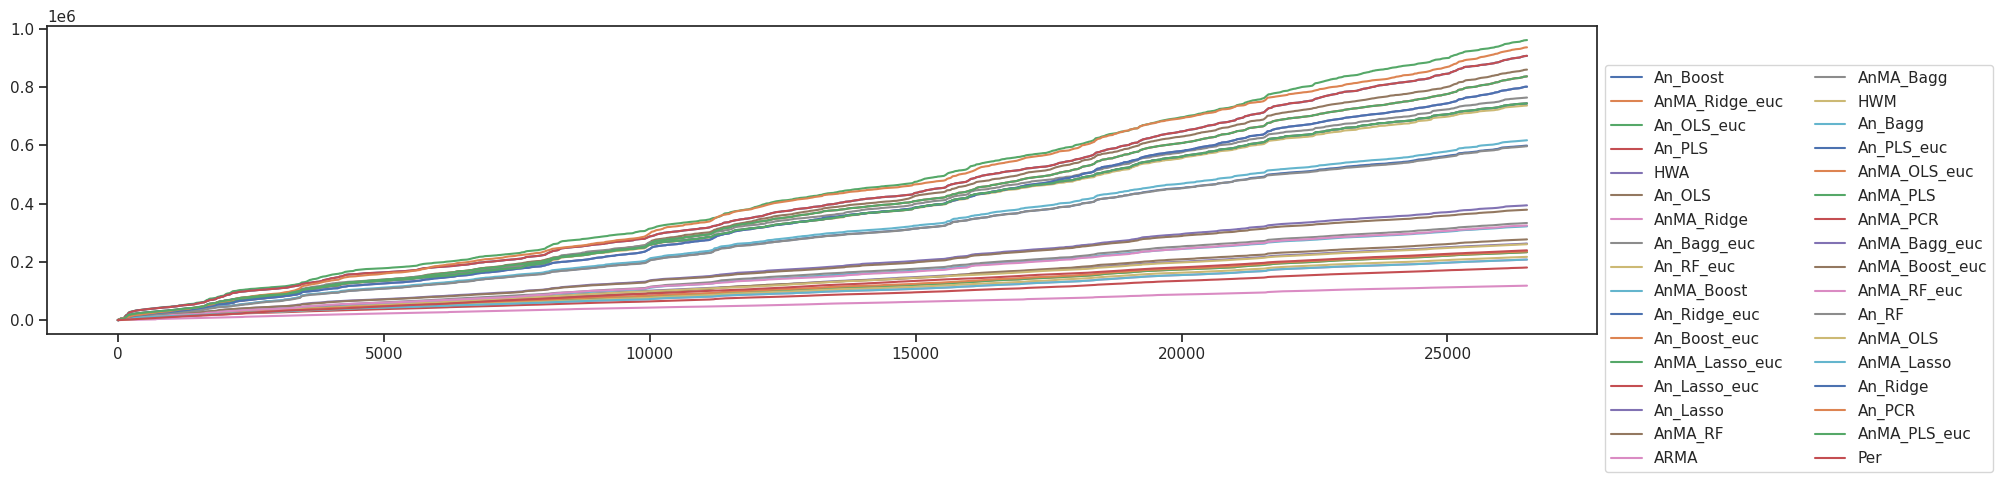

In [42]:
plt.figure(figsize=(20, 4))
for c in df_errors_not_x.columns:
    plt.plot(df_errors_not_x[c].abs().cumsum(), label = c)

plt.legend(bbox_to_anchor=(1, 0.9), ncol = 2)
plt.show()

In [43]:
df_errors_x_samp = df_errors_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_x_melt = df_errors_x_samp.melt(var_name='models', value_name='vals')
df_errors_x_melt.loc

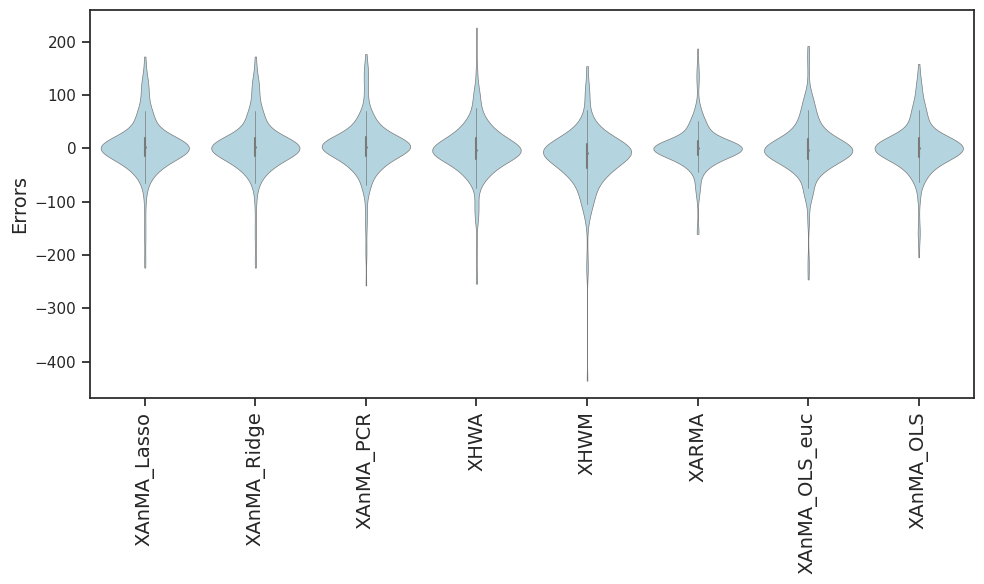

In [44]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
data=df_errors_x_melt.loc[  (df_errors_x_melt['models']=='XAnMA_PCR'    )  |
                            (df_errors_x_melt['models']=='XAnMA_Lasso'  )  |
                            (df_errors_x_melt['models']=='XAnMA_Ridge'  )  |
                            (df_errors_x_melt['models']=='XAnMA_OLS'    )  |
                            (df_errors_x_melt['models']=='XAnMA_OLS_euc')  |
                            (df_errors_x_melt['models']=='XHWA'         )  |
                            (df_errors_x_melt['models']=='XHWM'         )  | 
                            (df_errors_x_melt['models']=='XARMA'       )  ]
                                                                     
data.sort_values(by=['vals'], ascending=False)
sns.violinplot(x="models", y="vals", data=data, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
namefile = dir+'fig:violinsX.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

In [45]:
df_errors_not_x_samp = df_errors_not_x.sample(frac=0.01)
# https://stackoverflow.com/a/46134162
df_errors_not_x_melt = df_errors_not_x_samp.melt(var_name='models', value_name='vals')
df_errors_not_x_melt

,models,vals
0,An_Boost,-4.241238
1,An_Boost,-29.490088
2,An_Boost,64.395323
3,An_Boost,-3.374438
4,An_Boost,35.711969
...,...,...
9005,Per,-13.542139
9006,Per,-14.224756
9007,Per,-28.278857
9008,Per,-2.238379


In [46]:
type(data)

pandas.core.frame.DataFrame

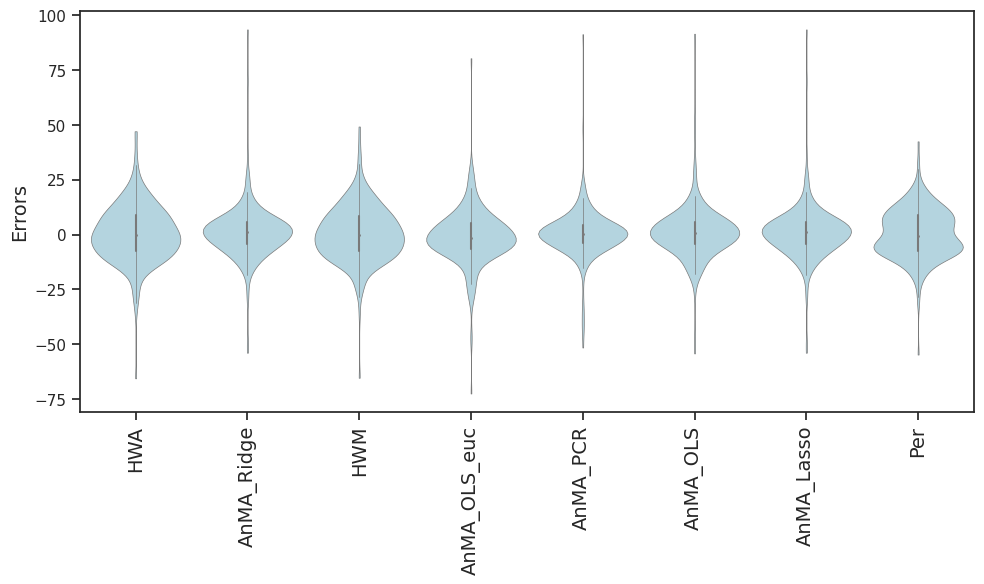

In [47]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure(figsize=(10, 6))
data=df_errors_not_x_melt.loc[  (df_errors_not_x_melt['models']=='AnMA_PCR'    )  |
                                (df_errors_not_x_melt['models']=='AnMA_Lasso'  )  |
                                (df_errors_not_x_melt['models']=='AnMA_Ridge'  )  |
                                (df_errors_not_x_melt['models']=='AnMA_OLS'    )  |
                                (df_errors_not_x_melt['models']=='AnMA_OLS_euc')  |
                                (df_errors_not_x_melt['models']=='Per'         )  |
                                (df_errors_not_x_melt['models']=='HWA'         )  | 
                                (df_errors_not_x_melt['models']=='HWM'         )   ]
                                                                     
data.sort_values(by=['vals'], ascending=False)

sns.violinplot(x="models", y="vals", data=data, cut=0, scale = 'width', linewidth = 0.5, color = 'lightblue')

plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
#plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
namefile = dir+'fig:violins.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

## Inference test

In [48]:
from scipy.stats import shapiro
import scipy.stats as stats

In [49]:
def means_test(alternative, labels, samples,alpha=0.05):
## Ho(Accepted): The difference between the pairs follows a symmetric distribution around zero.
## Ha(Rejected): The difference between the pairs does not follow a symmetric distribution around zero.
## We conduct the Mann-whitney U or two-sample t test alternative= {'two-sided', 'greater', 'less'} 
# ==============================================================================
## Tipo de prueba
    
	Ho   = labels[0]+'-'+labels[1]+': means the samples is of the same distribution.'
	decision1   = 'We fail to reject the Ho; Ho accepted:'
	if alternative == 'less':
		message1='\t: We fail to reject the null hypothesis; Ho accepted: \n\tThe difference between the pairs follows a symmetric distribution around zero.'
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is less than '+labels[1]+'\'s mean.'
	if alternative == 'greater':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t'+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: '+labels[0]+'\'s mean is greater than '+labels[1]+'\'s mean.'
	if alternative == 'two-sided':
		message2='\t: *We reject the null hypothesis and accept alternative hypothesis Ha:\n\t The mean difference between the pairs not follows a symmetric distribution around zero.'
		Ho   = labels[0]+'-'+labels[1]+': The means difference of the samples from the same distribution.'
		decision2   = 'We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.'

	## Checamos normalidad 
	normal=[]
	for s in samples:
		if shapiro(s).pvalue > alpha:
			normal.append(True)
		else:
			# print(labels[i],'\t:',round(shapiro(s).statistic,4),'\t',round(shapiro(s).pvalue,4),'\tWe reject the null hypothesis and accept Ha: Sample is not from the normal distributions.')
			normal.append(False)

	## Checamos homocedasticidad
	levene_test = stats.levene(samples[0], samples[1], center='mean')
	equalvar=False
	if levene_test.pvalue > alpha:
		equalvar =True
	#   print('[Harjk,Harduc]\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe fail to reject the null hypothesis; Ho accepted: the variances are equal across all samples. (Po>0.05)')
	# else:
	#   print(labels[0],labels[1],'\t:',round(levene_test.statistic,4),round(levene_test.pvalue,4),'\tWe reject the Ho and accept Ha: the variances are not equal across all samples. (Po<=0.05)')
	test = ''
	if normal[0]==True and normal[1]==True and equalvar==True: ## T-test two samples
		test = 'T-test for two samples'
		# print(labels[0],labels[1],stats.ttest_ind(samples[0], samples[1], alternative=alternative) )
		if stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.ttest_ind(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	else: ## Mann-whitney U Test
		test = 'Mann-whitney'
		# print(labels[0],labels[1],stats.mannwhitneyu(samples[0], samples[1], alternative=alternative) )
		if stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue > alpha:
			# print('\t',message1)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision1)
		else:
			# print('\t',message2)
			print(Ho,',',test,',', round(stats.mannwhitneyu(samples[0], samples[1], alternative=alternative).pvalue,4),',',decision2)
	  
## Kruskal-Wallis test discussion:  In this example, the test statistic comes out to be equal to 87 and the corresponding p-value is 2.1856E-17. 
## (As the p-value is not less than 0.05, we cannot reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to claim that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)
## (As the p-value is less than 0.05, we reject the null hypothesis that the median of optimality gap is the same for all groups. 
## Hence, We don’t have sufficient proof to reject that the different types of methods used to lead to statistically significant differences in the acuracy of methods.)

In [50]:
def varianze_test_levene(labels,samples,alpha=0.05):
## Ho(Accepted): We fail to reject the null hypothesis; Ho accepted: the variances are equal between samples.
## Ha(Rejected): We reject the Ho and accept Ha: the variances are not equal between samples.
## We conduct the Levene test
# ==============================================================================
    
	Ho   = labels[0]+'-'+labels[1]+':the variances are equal between samples'
	decision1   = 'We fail to reject the Ho; Ho accepted'
	decision2   = 'We reject the Ho and accept Ha: the variances are not equal between samples'
	test        = 'Levene'
	## Checamos homocedasticidad
	levene_test = stats.levene(samples[0], samples[1], center='mean')
	equalvar=False

	if levene_test.pvalue > alpha:
		equalvar = True
		print(Ho,',',test,',', round(stats.levene(samples[0],samples[1], center='mean').pvalue,4),',',decision1)
	else:
		print(Ho,',',test,',', round(stats.levene(samples[0],samples[1], center='mean').pvalue,4),',',decision2)

### RESULTADOS PARA TABLA

In [51]:
df_maes_not_x.iloc[:10].method.to_list()
df_errors_not_x_best = df_errors_not_x[df_maes_not_x.iloc[:10].method.to_list()]

best=[  'AnMA_PCR',
        'AnMA_OLS',
        'ARMA',
        'HWA',
        'HWM',
        'Per',]
df_errors_not_x_best = df_errors_not_x[best]

In [52]:
samples = [list(df_errors_not_x_best[c].abs().values) for c in df_errors_not_x_best.columns]
labels  = df_errors_not_x_best.columns
means   = []

print('\n RANKING==============================================================================\n')
i = 0
ordered_labels  = []
ordered_samples = []
for s in samples:
  means.append((i,np.mean(s)))
  i = i + 1
means.sort(key=lambda tup: tup[1], reverse=False) ##reverse=False

for m in means:  
  ordered_samples.append(samples[m[0]])
  ordered_labels.append(labels[m[0]])
  print(labels[m[0]],m[1])

print('\n Ha:less,alpha=0.05=====================================================================\n')
print('Means difference hypothesis test summary')
print('Null hypothesis,Test,Significance,Decision')
for i in range(len(ordered_labels)):
	for j in range(len(ordered_labels)):
		if j > i:
			means_test('two-sided',(ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)

# print('\n Ha:less,alpha=0.05=====================================================================\n')
# print('varianze difference hypothesis test summary')
# print('Null hypothesis,Test,Significance,Decision')
# for i in range(len(ordered_labels)):
# 	for j in range(len(ordered_labels)):
# 		if j > i:
# 			varianze_test_levene((ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)



 RANKING==============================================================================

AnMA_PCR nan
AnMA_OLS nan
HWA nan
HWM nan
Per nan

 Ha:less,alpha=0.05=====================================================================

Means difference hypothesis test summary
Null hypothesis,Test,Significance,Decision
AnMA_PCR-AnMA_OLS: The means difference of the samples from the same distribution. , Mann-whitney , nan , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
AnMA_PCR-HWA: The means difference of the samples from the same distribution. , Mann-whitney , nan , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
AnMA_PCR-HWM: The means difference of the samples from the same distribution. , Mann-whitney , nan , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
AnMA_PCR-Per: The means difference of the samples from the same distribution. 

/home/uriel/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
df_maes_x.iloc[:7].method.to_list()
df_errors_x_best = df_errors_x[df_maes_x.iloc[:7].method.to_list()]

bestX=[  'XAnMA_PCR',
         'XAnMA_OLS',
         'XHWA'     ,
         'XHWM'     ,
         'XARMA'    ,]
df_errors_x_best = df_errors_x[bestX]

In [54]:
samples = [list(df_errors_x_best[c].abs().values) for c in df_errors_x_best.columns]
labels = df_errors_x_best.columns
means  = []

print('\n RANKING==============================================================================\n')
i = 0
ordered_labels  = []
ordered_samples = []
for s in samples:
  means.append((i,np.mean(s)))
  i = i + 1
means.sort(key=lambda tup: tup[1], reverse=False) ##reverse=False

for m in means:  
  ordered_samples.append(samples[m[0]])
  ordered_labels.append(labels[m[0]])
  print(labels[m[0]],m[1])

print('\n Ha:less,alpha=0.05=====================================================================\n')
print('Means difference hypothesis test summary')
print('Null hypothesis,Test,Significance,Decision')
for i in range(len(ordered_labels)):
	for j in range(len(ordered_labels)):
		if j > i:
			means_test('two-sided',(ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)

# print('\n Ha:less,alpha=0.05=====================================================================\n')
# print('varianze difference hypothesis test summary')
# print('Null hypothesis,Test,Significance,Decision')
# for i in range(len(ordered_labels)):
# 	for j in range(len(ordered_labels)):
# 		if j > i:
# 			varianze_test_levene((ordered_labels[i],ordered_labels[j]),(ordered_samples[i],ordered_samples[j]),alpha=0.05)



 RANKING==============================================================================

XARMA 29.224151487161624
XAnMA_PCR 30.573666762977847
XAnMA_OLS 32.50196527724006
XHWA 37.709869862136394
XHWM 39.698545584969615

 Ha:less,alpha=0.05=====================================================================

Means difference hypothesis test summary
Null hypothesis,Test,Significance,Decision


/home/uriel/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


XARMA-XAnMA_PCR: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XARMA-XAnMA_OLS: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XARMA-XHWA: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XARMA-XHWM: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same distribution.
XAnMA_PCR-XAnMA_OLS: The means difference of the samples from the same distribution. , Mann-whitney , 0.0 , We reject the Ho and accept Ha: The means difference of the samples not from the same 